In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.lines as mlines


In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sv_file_loc = parent_dir + "/data/all_samples/concatenated-sv.csv"
snp_file_loc = parent_dir + "/data/all_samples/concatenated-snp.csv"

print(sv_file_loc)

/home/cm/Documents/bioinformatique/BILL2/repo/bill_projet/data/all_samples/concatenated-sv.csv


In [3]:
test_file = parent_dir + "/data/test_file.csv"

def write_test_file(df):
    with open(test_file, "w") as out_file:
        df.to_csv(test_file, sep = "\t", index = False)

In [4]:
df = pd.read_csv(sv_file_loc, sep = "\t")
df_snp = pd.read_csv(snp_file_loc, sep = "\t")

In [5]:
df_time = df.copy()


#df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_time['group'] = pd.to_numeric(df_time['group'], downcast='integer')

df_time["generation"] = df_time["sample"].str.extract(r"(\d+)-")
df_time['generation'] = pd.to_numeric(df_time['generation'], downcast='integer')


df_time = df_time.drop_duplicates(subset = ["REF", "ALT", "POS"])

with open(test_file, "w") as out_file:
    df_time.to_csv(test_file, sep = "\t", index = False)

In [6]:
df_groups = []

for group_no in range(1,11):
    a_df = df_time[df_time["group"] == group_no]
    df_groups.append(a_df)
    a_df = df_time.copy()

df_groups[5]

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO,group,generation
156,11375,P65-6,Sniffles2.INS.DS0,N,GTAAGTACAAATTGTTTGACACATCAACT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=29;END=11375;SUPPORT=...,GT:GQ:DR:DV,0/1:60:183:60,6,65
157,11384,P65-6,Sniffles2.DEL.FES0,TCAATTGTTTGACACATCAACTGTAAGTACATC,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-33;END=11417;SUPPORT...,GT:GQ:DR:DV,1/1:60:37:213,6,65
158,16096,P65-6,Sniffles2.DEL.10CS0,TGAGTGTGTGTGTGTGTGTG,N,60,GT,PRECISE;SVTYPE=DEL;SVLEN=-20;END=16116;SUPPORT...,GT:GQ:DR:DV,0/0:60:274:33,6,65
159,16097,P65-6,Sniffles2.DEL.10BS0,GAGTGTGTGTGT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-12;END=16109;SUPPORT...,GT:GQ:DR:DV,0/1:60:172:135,6,65
160,22620,P65-6,Sniffles2.INS.20S0,N,GTGTAGTGGTGTAGTGGTGTAGTGGTGTAT,60,GT,IMPRECISE;SVTYPE=INS;SVLEN=32;END=22620;SUPPOR...,GT:GQ:DR:DV,0/0:60:164:10,6,65
...,...,...,...,...,...,...,...,...,...,...,...,...
2247,216485,P90-6,Sniffles2.INS.1CES0,N,<INS>,60,GT,IMPRECISE;SVTYPE=INS;SVLEN=71;END=216485;SUPPO...,GT:GQ:DR:DV,0/0:60:1649:12,6,90
2254,231446,P90-6,Sniffles2.INS.1FDS0,N,ACCTACCTGGTC,59,GT,PRECISE;SVTYPE=INS;SVLEN=12;END=231446;SUPPORT...,GT:GQ:DR:DV,1/1:60:0:2026,6,90
2260,256462,P90-6,Sniffles2.INS.23AS0,N,GTGCTTGGTGTGGTTGGGGTCGAAGTCGTACTTGGAGTTG,60,GT,PRECISE;SVTYPE=INS;SVLEN=40;END=256462;SUPPORT...,GT:GQ:DR:DV,0/0:60:1558:228,6,90
2261,256522,P90-6,Sniffles2.INS.238S0,N,<INS>,60,GT,PRECISE;SVTYPE=INS;SVLEN=13;END=256522;SUPPORT...,GT:GQ:DR:DV,0/0:60:1778:15,6,90


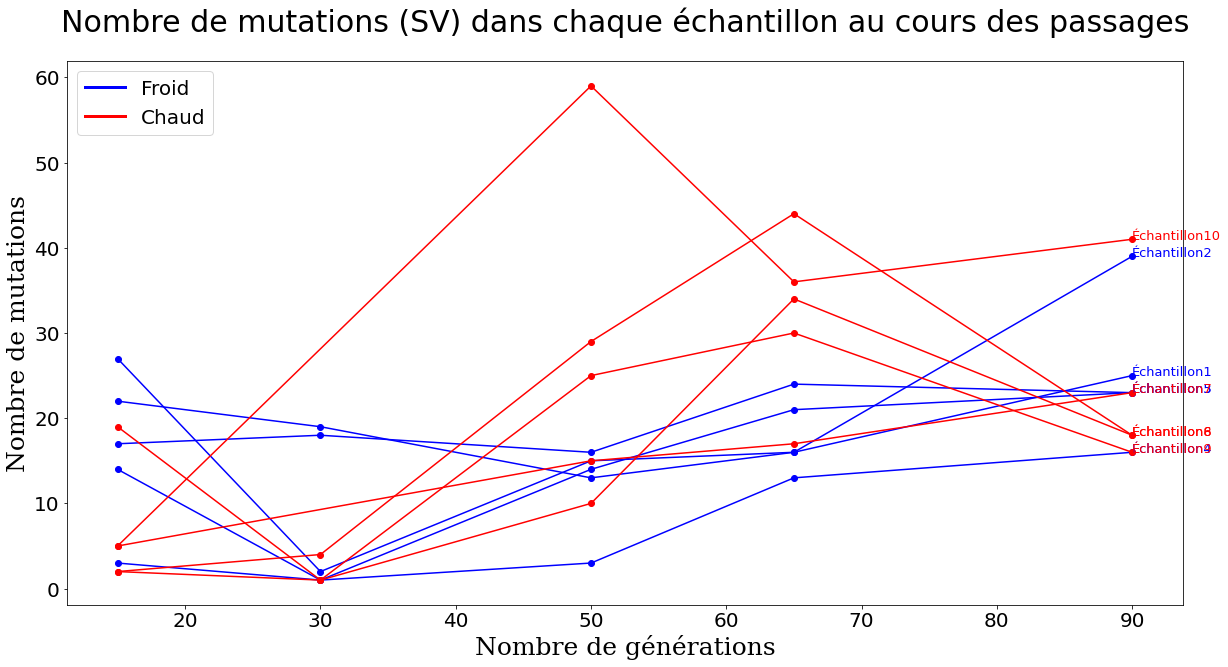

In [8]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de générations", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) dans chaque échantillon au cours des passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



# SNP 


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [9]:
df_snp_time = df_snp.copy()


#df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_snp_time["group"] = df_snp_time["sample"].str.extract(r"-(\d+)$")
df_snp_time['group'] = pd.to_numeric(df_snp_time['group'], downcast='integer')

df_snp_time["generation"] = df_snp_time["sample"].str.extract(r"(\d+)-")
df_snp_time['generation'] = pd.to_numeric(df_snp_time['generation'], downcast='integer')


df_snp_time = df_snp_time.drop_duplicates(subset = ["REF", "ALT", "POS"])

write_test_file(df_snp_time)

In [10]:
df_snp_groups = []

for group_no in range(1,11):
    a_df = df_snp_time[df_snp_time["group"] == group_no]
    df_snp_groups.append(a_df)
    a_df = df_snp_time.copy()

df_snp_groups[5]

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO,group,generation
0,15,P65-6,.,T,C,24.970,PASS,.,GT:GQ,0/1:25,6,65
1,17,P65-6,.,T,A,26.222,PASS,.,GT:GQ,0/1:26,6,65
2,633,P65-6,.,A,C,36.593,PASS,.,GT:GQ,1/1:37,6,65
3,4939,P65-6,.,T,C,36.141,PASS,.,GT:GQ,1/1:36,6,65
4,5325,P65-6,.,C,G,27.664,PASS,.,GT:GQ,0/1:28,6,65
...,...,...,...,...,...,...,...,...,...,...,...,...
10446,254131,P30-6,.,G,A,14.940,PASS,.,GT:GQ,0/1:15,6,30
10447,254137,P30-6,.,G,A,17.925,PASS,.,GT:GQ,0/1:18,6,30
10448,254141,P30-6,.,T,C,9.199,PASS,.,GT:GQ,0/1:9,6,30
10449,254142,P30-6,.,T,A,12.321,PASS,.,GT:GQ,0/1:12,6,30


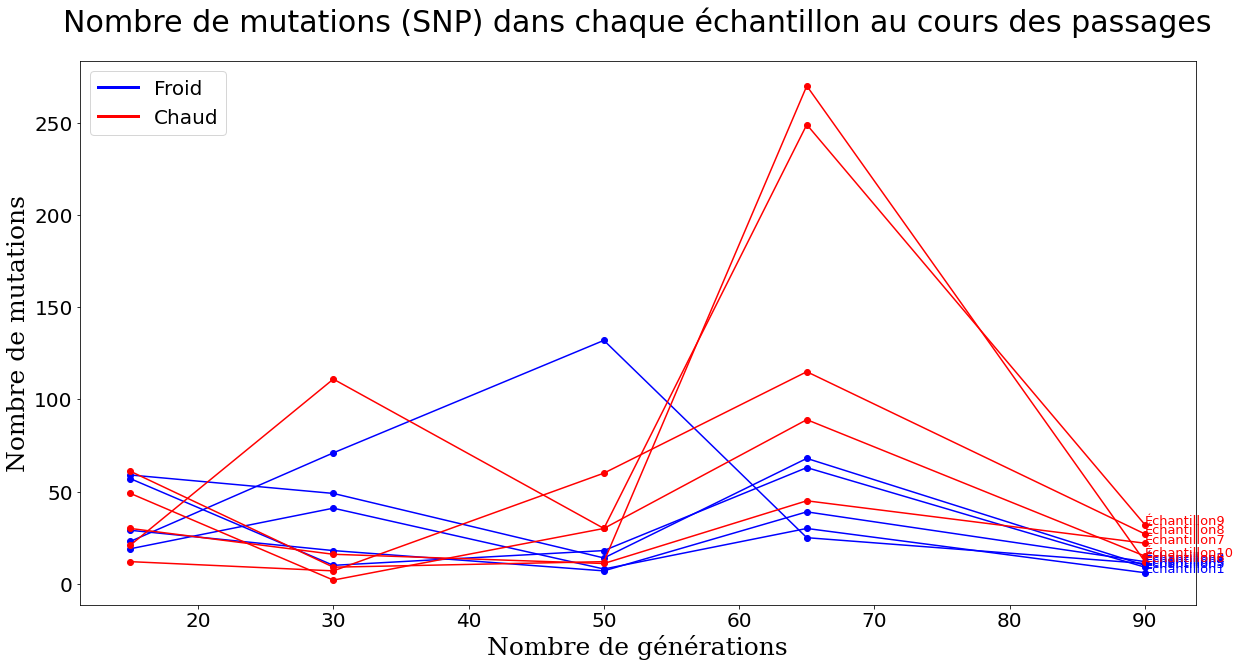

In [11]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_snp_groups:
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de générations", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SNP) dans chaque échantillon au cours des passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

In [12]:
df

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO
0,1,P15-2,Sniffles2.DUP.6ADS0,N,<DUP>,59,PASS,PRECISE;SVTYPE=DUP;SVLEN=272677;END=272678;SUP...,GT:GQ:DR:DV,./.:0:0:0
1,11375,P15-2,Sniffles2.INS.1CS0,N,GTAAGTACATCAATTGTTTGACACATCAACT,60,GT,PRECISE;SVTYPE=INS;SVLEN=31;END=11375;SUPPORT=...,GT:GQ:DR:DV,1/1:60:0:572
2,16099,P15-2,Sniffles2.DEL.3BAS0,GTGTGTGTGT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-10;END=16109;SUPPORT...,GT:GQ:DR:DV,0/1:60:339:196
3,16099,P15-2,Sniffles2.DEL.3BBS0,GTGTGTGTGTGTGTGTGTGTGTGT,N,60,GT,PRECISE;SVTYPE=DEL;SVLEN=-24;END=16123;SUPPORT...,GT:GQ:DR:DV,0/0:60:489:46
4,31256,P15-2,Sniffles2.DEL.3F0S0,CGTTCACGAAGACGGCTTGGAATACAT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-27;END=31283;SUPPORT...,GT:GQ:DR:DV,1/1:60:3:318
...,...,...,...,...,...,...,...,...,...,...
2424,256462,P65-4,Sniffles2.INS.88S0,N,CGTGCTTGGTGTGGTTGGGGTCTGAGTCCGTACTGGTGTT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=40;END=256462;SUPPORT...,GT:GQ:DR:DV,0/1:32:78:25
2425,265177,P65-4,Sniffles2.INS.8AS0,N,TTCTTGAAGTGT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=12;END=265177;SUPPORT...,GT:GQ:DR:DV,1/1:60:9:79
2426,270829,P65-4,Sniffles2.INS.91S0,N,ACAGAGACACAAGACAGAC,60,PASS,PRECISE;SVTYPE=INS;SVLEN=19;END=270829;SUPPORT...,GT:GQ:DR:DV,0/1:60:35:58
2427,271616,P65-4,Sniffles2.INS.93S0,N,TCAGTGTCCTCC,60,PASS,PRECISE;SVTYPE=INS;SVLEN=12;END=271616;SUPPORT...,GT:GQ:DR:DV,0/1:60:52:48


In [19]:
[df["INFO"]]

[0       PRECISE;SVTYPE=DUP;SVLEN=272677;END=272678;SUP...
 1       PRECISE;SVTYPE=INS;SVLEN=31;END=11375;SUPPORT=...
 2       PRECISE;SVTYPE=DEL;SVLEN=-10;END=16109;SUPPORT...
 3       PRECISE;SVTYPE=DEL;SVLEN=-24;END=16123;SUPPORT...
 4       PRECISE;SVTYPE=DEL;SVLEN=-27;END=31283;SUPPORT...
                               ...                        
 2424    PRECISE;SVTYPE=INS;SVLEN=40;END=256462;SUPPORT...
 2425    PRECISE;SVTYPE=INS;SVLEN=12;END=265177;SUPPORT...
 2426    PRECISE;SVTYPE=INS;SVLEN=19;END=270829;SUPPORT...
 2427    PRECISE;SVTYPE=INS;SVLEN=12;END=271616;SUPPORT...
 2428    PRECISE;SVTYPE=DEL;SVLEN=-24;END=272036;SUPPOR...
 Name: INFO, Length: 2429, dtype: object]